<a href="https://colab.research.google.com/github/maushamkumar/Deep-learning-/blob/main/early_stoping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

we created our dataset using `make_circles`

In [68]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
sns.scatterplot(X[:,0],X[:,1],hue=y)

<Axes: >

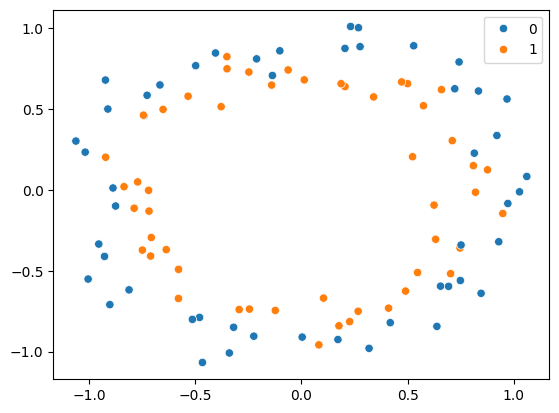

In [70]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

Using `train_test_split` function from scikit-learn we split our dataset into train and test

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

we created a Neural network
where we have only one hidden layer and there are 256 neurons

In [72]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

For the loss function we used `binary_crossentropy` as an optimizer we used `Adam` and `accuracy` as a metric.

In [73]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

we are plotting training data loss and validation data loss

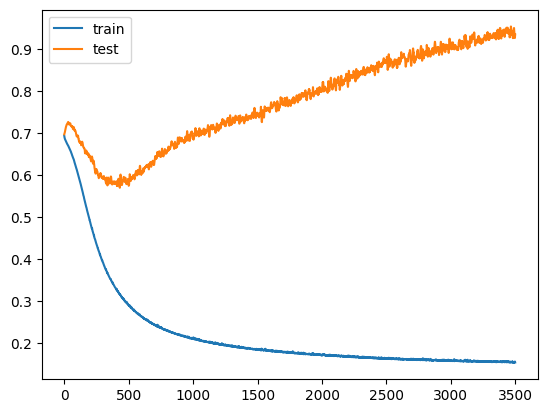

In [75]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 17s 2ms/step


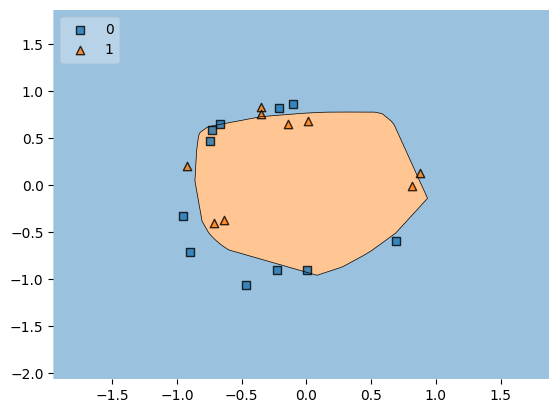

In [76]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()

# Early Stopping

In [77]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [82]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

In [83]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 1s 159ms/step - loss: 0.0000e+00 - accuracy: 0.4875 - val_loss: 0.0000e+00 - val_accuracy: 0.5500
Epoch 2/3500
3/3 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.4875 - val_loss: 0.0000e+00 - val_accuracy: 0.5500
Epoch 3/3500
3/3 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.4875 - val_loss: 0.0000e+00 - val_accuracy: 0.5500
Epoch 4/3500
3/3 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.4875 - val_loss: 0.0000e+00 - val_accuracy: 0.5500
Epoch 5/3500
3/3 [==============================] - 0s 37ms/step - loss: 0.0000e+00 - accuracy: 0.4875 - val_loss: 0.0000e+00 - val_accuracy: 0.5500
Epoch 6/3500
3/3 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.4875 - val_loss: 0.0000e+00 - val_accuracy: 0.5500
Epoch 7/3500
3/3 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 0.4875 - val_loss: 0.0

In [58]:
new_weights

array([[-0.21928129,  0.6877785 , -0.15512395, -0.42063347,  0.23871635,
        -0.09223241,  0.44197616, -0.3475602 , -0.06658152, -0.39862677],
       [ 0.48023403, -0.64895135,  0.23954684,  0.3146589 , -0.0225894 ,
         0.51941186, -0.25079325,  0.6409766 ,  0.18656857,  0.5224565 ]],
      dtype=float32)

Here you can see we are facing a problem called the Vanishing gradient problem.

Now, Let's talk about how to solve this problem.
1. Reduce the model complexity
2. Using different activation functions like ReLU, Sigmoid, Tanh, etc
3. Using different optimizers like Adam, SGD, etc
4. Proper weights initialization
5. Batch Normalization

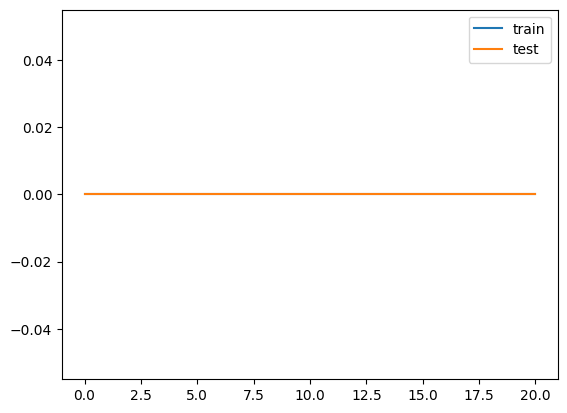

In [85]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 15s 2ms/step


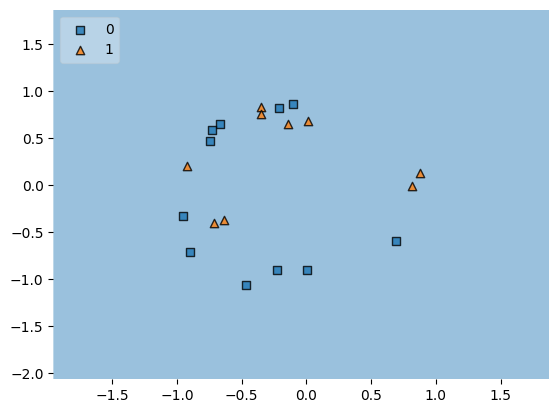

In [86]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()